In [1]:
#Packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, r2_score,mean_absolute_error, mean_squared_error
from sklearn.naive_bayes import GaussianNB

In [2]:
#Dataset extraction
subscription_data=pd.read_csv("Bank_Additional_Full_Data.csv")

In [3]:
#Dataset column info
subscription_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [4]:
#Changing null values with 0
subscription_data=subscription_data.fillna(0)

In [5]:
#Assigning the value of the dependent variable as 1 and 0
cond0=[
    subscription_data['subscribed']=="no",
    subscription_data['subscribed']=="yes"
    
]
val0=[0,1]
subscription_data['out']=np.select(cond0,val0)

In [6]:
# Target and feature variable assignment
feature = subscription_data.drop(['subscribed','out'],axis=1)
target = subscription_data['out']

In [7]:
#Convert object type variables to dummy variables 
job = pd.get_dummies(feature['job'],drop_first=True)
marital=pd.get_dummies(feature['marital'],drop_first=True)
education=pd.get_dummies(feature['education'],drop_first=True)
default=pd.get_dummies(feature['default'],drop_first=True)
housing=pd.get_dummies(feature['housing'],drop_first=True)
loan=pd.get_dummies(feature['loan'],drop_first=True)
contact=pd.get_dummies(feature['contact'],drop_first=True)
month=pd.get_dummies(feature['month'],drop_first=True)
day_of_week=pd.get_dummies(feature['day_of_week'],drop_first=True)
poutcome=pd.get_dummies(feature['poutcome'],drop_first=True)

In [8]:
#Keeping the necessary features
feature.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],axis=1,inplace=True)

In [9]:
#Final feature variable
feature = pd.concat([feature,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome],axis=1)

In [10]:
#Splitting the dataset into test and training
X_train,X_test,Y_train,Y_test = train_test_split(feature, target ,test_size=0.15,random_state=40)

In [11]:
#ML Algorithm 1- Gaussian Naive Bayes
import warnings
with warnings.catch_warnings(record=True):
    gsian_nbayes = GaussianNB()
    gsian_nbayes.fit(X_train, Y_train)
    Y_pred = gsian_nbayes.predict(X_test)
    print('Mean Absolute Error of Algorithm 1- Gaussian Naive Bayes is :', mean_absolute_error(Y_test, Y_pred))
    print('Root Mean Squared Error of Algorithm 1- Gaussian Naive Bayes is :', np.sqrt(mean_squared_error(Y_test, Y_pred)))
    print('R-squared value of Algorithm 1- Gaussian Naive Bayes is :',r2_score(Y_test, Y_pred))
    print('Classification Report of Algorithm 1- Gaussian Naive Bayes is :\n',classification_report(Y_test, Y_pred))

Mean Absolute Error of Algorithm 1- Gaussian Naive Bayes is : 0.13335491179802558
Root Mean Squared Error of Algorithm 1- Gaussian Naive Bayes is : 0.3651779180043963
R-squared value of Algorithm 1- Gaussian Naive Bayes is : -0.2620662952803665
Classification Report of Algorithm 1- Gaussian Naive Bayes is :
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      5437
           1       0.45      0.48      0.46       742

    accuracy                           0.87      6179
   macro avg       0.69      0.70      0.69      6179
weighted avg       0.87      0.87      0.87      6179



In [12]:
#ML Algorithm 2- Logistic Regression
import warnings
with warnings.catch_warnings(record=True):
    logs_regr = LogisticRegression()
    logs_regr.fit(X_train, Y_train)
    Y_pred1 = logs_regr.predict(X_test)
    print('Mean Absolute Error of Algorithm  2- Logistic Regression is :', mean_absolute_error(Y_test, Y_pred1))
    print('Root Mean Squared Error of Algorithm  2- Logistic Regression is :', np.sqrt(mean_squared_error(Y_test, Y_pred1)))
    print('R-squared value of Algorithm  2- Logistic Regression is :',r2_score(Y_test, Y_pred1))
    print('Classification Report of Algorithm  2- Logistic Regression is :\n',classification_report(Y_test, Y_pred1))

Mean Absolute Error of Algorithm  2- Logistic Regression is : 0.0983977989966014
Root Mean Squared Error of Algorithm  2- Logistic Regression is : 0.3136842345362632
R-squared value of Algorithm  2- Logistic Regression is : 0.06876661707468112
Classification Report of Algorithm  2- Logistic Regression is :
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      5437
           1       0.66      0.37      0.47       742

    accuracy                           0.90      6179
   macro avg       0.79      0.67      0.71      6179
weighted avg       0.89      0.90      0.89      6179



In [13]:
#ML Algorithm 3- Decision Tree
import warnings
with warnings.catch_warnings(record=True):
    decsn_tr = DecisionTreeClassifier(random_state=8)
    decsn_tr.fit(X_train, Y_train)
    Y_pred2 = decsn_tr.predict(X_test)
    print('Mean Absolute Error of Algorithm 3- Decision Tree is :', mean_absolute_error(Y_test, Y_pred2))
    print('Root Mean Squared Error of Algorithm 3- Decision Tree is :', np.sqrt(mean_squared_error(Y_test, Y_pred2)))
    print('R-squared value of Algorithm 3- Decision Tree is :',r2_score(Y_test, Y_pred2))
    print('Classification Report of Algorithm 3- Decision Tree is :\n',classification_report(Y_test, Y_pred2))

Mean Absolute Error of Algorithm 3- Decision Tree is : 0.11134487781194367
Root Mean Squared Error of Algorithm 3- Decision Tree is : 0.3336837991451543
R-squared value of Algorithm 3- Decision Tree is : -0.05376409120496617
Classification Report of Algorithm 3- Decision Tree is :
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      5437
           1       0.54      0.53      0.53       742

    accuracy                           0.89      6179
   macro avg       0.74      0.73      0.73      6179
weighted avg       0.89      0.89      0.89      6179



In [14]:
#ML Algorithm 4- Principal Component Analysis for Clustering
pca = PCA()
numbers = feature.values
pca.fit(numbers)
sub_pca = pca.transform(numbers)

Text(0.5, 0, 'PC 1')

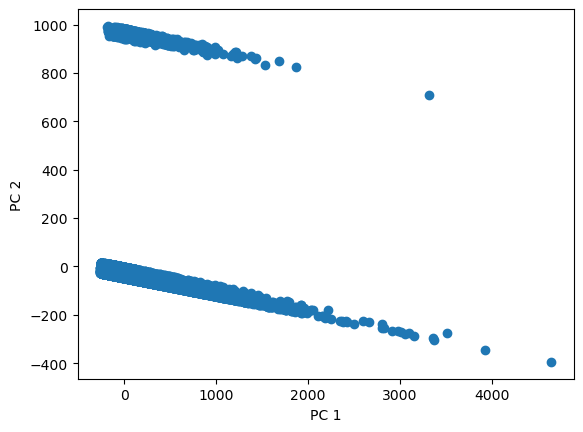

In [15]:
#Scatter visualisation for PC1 vs PC2
ax = plt.gca()
ax.scatter(sub_pca[:,0], sub_pca[:,1])
ax.set_ylabel('PC 2')
ax.set_xlabel('PC 1')

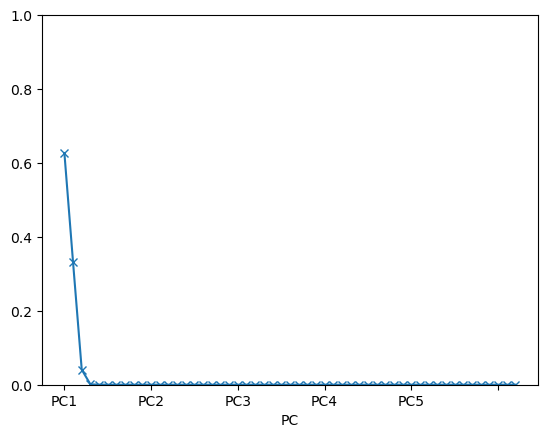

In [16]:
#Scree plot technique
import warnings
with warnings.catch_warnings(record=True):
    ax = plt.gca()
    expl_vrnce = pca.explained_variance_ratio_
    ax.plot(expl_vrnce, marker='x')
    ax.set_ylim(0,1.)
    ax.set_xlabel('PC')
    ax.set_xticklabels(["PC{}".format(i) for i in range(6)])

In [17]:
#PCA Explanation of variance
print("PCA Explanation of variance:",expl_vrnce)

PCA Explanation of variance: [6.26922320e-01 3.30904467e-01 4.08537841e-02 1.01342190e-03
 1.91030837e-04 6.95091080e-05 8.05755752e-06 3.67051082e-06
 2.83757773e-06 2.45573254e-06 2.32783261e-06 2.23258822e-06
 1.99156081e-06 1.94693218e-06 1.91796485e-06 1.82961747e-06
 1.81217298e-06 1.78509210e-06 1.37942249e-06 1.21036817e-06
 1.19031781e-06 1.00176860e-06 9.27956439e-07 7.39409779e-07
 6.12778452e-07 5.35374435e-07 5.01357331e-07 4.33804765e-07
 4.20600795e-07 4.19037856e-07 4.08890800e-07 3.55045692e-07
 3.22835678e-07 3.06620191e-07 2.66954437e-07 2.32238545e-07
 1.85629172e-07 1.80479245e-07 1.60574175e-07 1.45012786e-07
 1.37854207e-07 1.18892098e-07 9.65996686e-08 8.43839362e-08
 6.55914223e-08 6.10576827e-08 3.76384866e-08 2.65709312e-08
 1.76246969e-08 1.43805722e-08 4.04179918e-09 6.76464746e-10
 5.25400579e-33]
